**Examples of various interpolation methods**

N. Stergioulas

Aristotle University of Thessaloniki

v1.0 (April 2020)

###### Content provided under a Creative Commons Attribution license, [CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/); code under [GNU GPLv3 License](https://choosealicense.com/licenses/gpl-3.0/). (c)2018 [Nikolaos Stergioulas](http://www.astro.auth.gr/~niksterg/)

In [1]:
import numpy as np
import scipy as sp
from astropy.table import Table, Column
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy.interpolate import lagrange
from scipy.interpolate import interp1d
from scipy.interpolate import PchipInterpolator

### EXAMPLE 1

Load data

In [2]:
data_table = Table(rows=[(-3, -1),(-2, -1),(-1,-1),(0, 0), (1, 1), (2, 1), (3,1)], 
names=('x', 'y'))

In [3]:
print(data_table)

 x   y 
--- ---
 -3  -1
 -2  -1
 -1  -1
  0   0
  1   1
  2   1
  3   1


In [4]:
x_data = np.array(data_table['x'])
y_data = np.array(data_table['y'])

Compute Lagrange interpolating polynomial

In [5]:
plang = sp.interpolate.lagrange(x_data, y_data)

In [6]:
display(plang)

poly1d([-4.33680869e-19,  1.66666667e-02,  6.07153217e-17, -2.50000000e-01,
       -3.29597460e-17,  1.23333333e+00,  0.00000000e+00])

In [7]:
print(np.poly1d(plang))

            6           5             4        3             2
-4.337e-19 x + 0.01667 x + 6.072e-17 x - 0.25 x - 3.296e-17 x + 1.233 x


Create numerical table for plotting

In [8]:
x_lang = np.arange(-3 ,3.01, 0.01)
y_lang = plang(x_lang)

Compute a spline interpolation to the data

In [9]:
spline = interp1d(x_data, y_data, kind='cubic')

x_spline = np.arange(-3, 3, 0.01)
y_spline = spline(x_spline)

Compute a monotone, piecewise cubic Hermite interpolation to the data

In [10]:
pchip = PchipInterpolator(x_data,y_data)

x_pchip = np.arange(-3, 3, 0.01)
y_pchip = pchip(x_pchip)

Set font sizes for the plot

In [11]:
mpl.rc('xtick', labelsize=18) 
mpl.rc('ytick', labelsize=18) 
mpl.rc('legend', fontsize=18)

Create plot

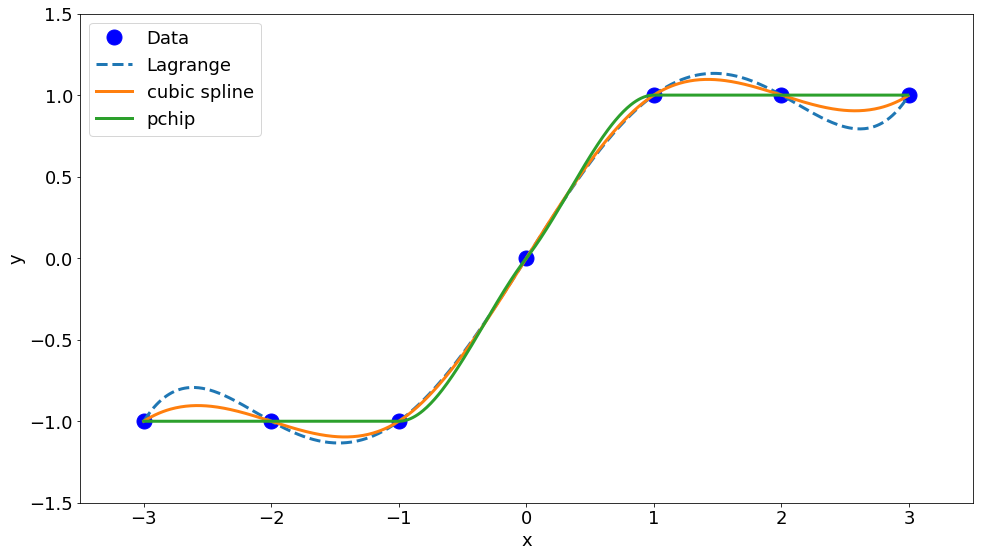

In [12]:
plt.figure(figsize=(16,9))
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.axis([-3.5, 3.5, -1.5, 1.5])
comp_plot = plt.plot(x_data,y_data, 'bo', x_lang,y_lang, '--', x_spline,y_spline, '-', x_pchip,y_pchip, '-', 
                     linewidth=3, markersize=15)
plt.legend(['Data', 'Lagrange', 'cubic spline', 'pchip'], loc='best')
plt.show(comp_plot)

### EXAMPLE 2

In [13]:
data_table = Table(rows=[(0, 0),(1, 0),(2,0),(3, 0), (4, 1), (5, 0), (6,0), 
                        (7, 0),(8, 0),(9,0)], 
names=('x', 'y'))

In [14]:
print(data_table)

 x   y 
--- ---
  0   0
  1   0
  2   0
  3   0
  4   1
  5   0
  6   0
  7   0
  8   0
  9   0


In [15]:
x_data = np.array(data_table['x'])
y_data = np.array(data_table['y'])

In [16]:
plang = sp.interpolate.lagrange(x_data, y_data)

In [17]:
print(np.poly1d(plang))

            9           8          7         6         5         4
-0.0003472 x + 0.01424 x - 0.2451 x + 2.301 x - 12.77 x + 42.45 x
          3         2
 - 81.49 x + 81.24 x - 31.5 x


In [18]:
x_lang = np.arange(0,9.01,0.01)
y_lang = plang(x_lang)

In [19]:
spline = interp1d(x_data, y_data, kind='cubic')

x_spline = np.arange(0,9,0.01)
y_spline = spline(x_spline)

In [20]:
pchip = PchipInterpolator(x_data,y_data)

x_pchip = np.arange(0,9,0.01)
y_pchip = pchip(x_pchip)

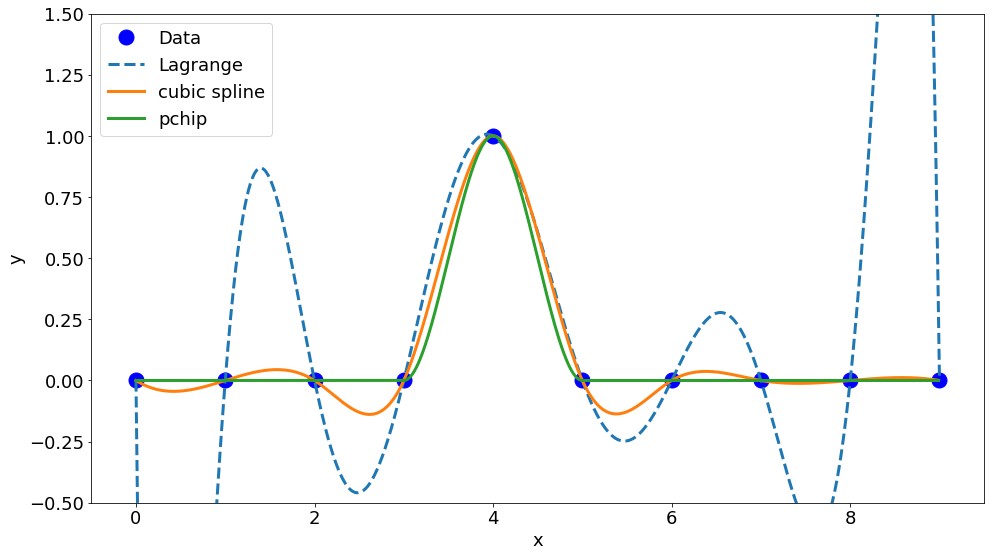

In [21]:
plt.figure(figsize=(16,9))
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.axis([-0.5, 9.5, -0.5, 1.5])
comp_plot = plt.plot(x_data,y_data, 'bo', x_lang,y_lang, '--', x_spline,y_spline, '-', x_pchip,y_pchip, '-', 
                     linewidth=3, markersize=15)
plt.legend(['Data', 'Lagrange', 'cubic spline', 'pchip'], loc='best')
plt.show(comp_plot)

### EXAMPLE 3

In [22]:
data_table = Table(rows=[(0, 1.3), (0.4, 1.5), (1, 1.8), (1.2, 2.1), (1.7, 2.6), (2.1,2.7), 
                        (3, 2.4),(3.5, 2.1),(3.8,2),(5, 2.2), (6.1, 2.3), (7.1, 2.2), 
                        (8.3, 1.9),(9.6, 1.4), (10.4, 0.9),(10.7,0.7),(11.1,0.6),(11.7,0.3)], 
names=('x', 'y'))

In [23]:
print(data_table)

 x    y 
---- ---
 0.0 1.3
 0.4 1.5
 1.0 1.8
 1.2 2.1
 1.7 2.6
 2.1 2.7
 3.0 2.4
 3.5 2.1
 3.8 2.0
 5.0 2.2
 6.1 2.3
 7.1 2.2
 8.3 1.9
 9.6 1.4
10.4 0.9
10.7 0.7
11.1 0.6
11.7 0.3


In [24]:
x_data = np.array(data_table['x'])
y_data = np.array(data_table['y'])

In [25]:
plang = sp.interpolate.lagrange(x_data, y_data)

In [26]:
print(np.poly1d(plang))

            17             16             15             14
-6.131e-10 x  + 5.726e-08 x  - 2.428e-06 x  + 6.189e-05 x 
             13           12          11          10        9         8
 - 0.001057 x  + 0.01277 x  - 0.1124 x  + 0.7286 x  - 3.49 x + 12.24 x
          7         6         5         4         3         2
 - 30.71 x + 52.81 x - 56.73 x + 28.88 x + 4.725 x - 11.28 x + 3.427 x + 1.3


In [27]:
x_lang = np.arange(0,11.71,0.01)
y_lang = plang(x_lang)

In [28]:
spline = interp1d(x_data, y_data, kind='cubic')
x_spline = np.arange(0,11.7,0.01)
y_spline = spline(x_spline)

In [29]:
pchip = PchipInterpolator(x_data,y_data)
x_pchip = np.arange(0,11.7,0.01)
y_pchip = pchip(x_pchip)

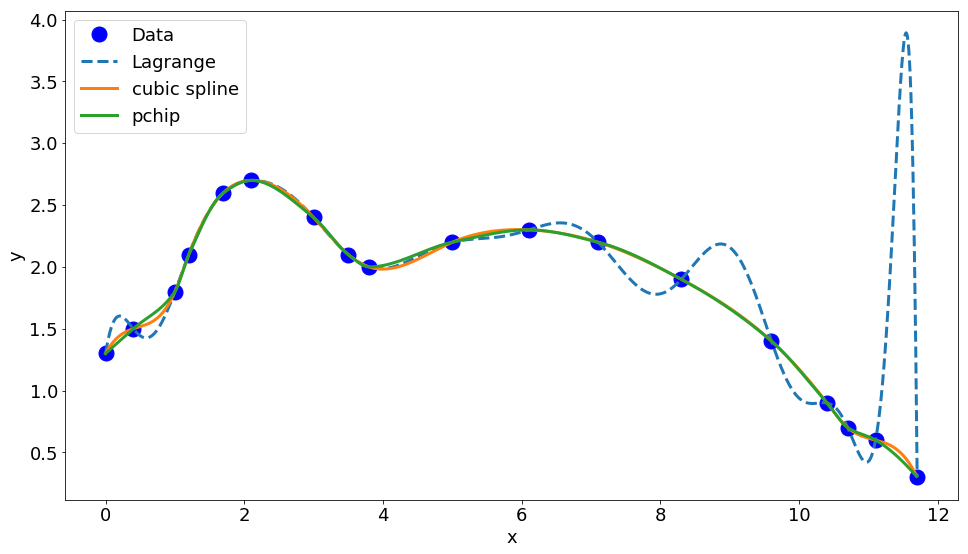

In [30]:
plt.figure(figsize=(16,9))
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
comp_plot = plt.plot(x_data,y_data, 'bo', x_lang,y_lang, '--', x_spline,y_spline, '-', x_pchip,y_pchip, '-',
                    linewidth=3, markersize=15)
plt.legend(['Data', 'Lagrange', 'cubic spline', 'pchip'], loc='best')
plt.show(comp_plot)